In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
x_test=np.loadtxt("/home/ubuntu/squatsmart_insight/train_test_set/x_features_test.txt")
xs_test = x_test.shape
x_new_test = np.zeros((xs_test[0], xs_test[1]+1))
x_new_test[:, :-1] = x_test
x_new_test[:,-1]=((x_test[:,14]-x_test[:,11])/(x_test[:,5]-x_test[:,2]))
x_new_test[np.isinf(x_new_test)]=0.0
x_new_test.shape

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(1277, 51)

In [3]:
x_train=np.loadtxt("/home/ubuntu/squatsmart_insight/train_test_set/x_features_train.txt")
xs_train = x_train.shape
x_new_train = np.zeros((xs_train[0], xs_train[1]+1))
x_new_train[:, :-1] = x_train
x_new_train[:,-1]=((x_train[:,14]-x_train[:,11])/(x_train[:,5]-x_train[:,2]))
x_new_train[np.isinf(x_new_train)]=0.0
x_new_train.shape

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(2174, 51)

In [4]:
with open("/home/ubuntu/squatsmart_insight/train_test_set/y_labels_test.txt", "r") as fp:
    y_test = [x[:-1] for x in fp.readlines()]
with open("/home/ubuntu/squatsmart_insight/train_test_set/y_labels_train.txt", "r") as fp:
    y_train = [x[:-1] for x in fp.readlines()]

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(x_new_train, y_train)
model.score(x_new_test,y_test)

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

0.6844166014095536

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_new_train, y_train)
neigh.score(x_new_test,y_test)


0.754894283476899

In [7]:
from sklearn import svm
clf_svc_lin = svm.SVC(kernel='linear')
clf_svc_lin.fit(x_new_train, y_train)
clf_svc_lin.score(x_new_test,y_test)

0.8026624902114331

In [8]:
clf_svc = svm.SVC()
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8386844166014096

In [9]:
np.absolute(clf_svc_lin.coef_[0])

array([0.8344564 , 2.11475509, 1.29100501, 0.03507181, 7.81698217,
       1.82965717, 1.91788089, 3.4010007 , 0.84214297, 2.02775771,
       1.71197726, 1.58828951, 0.68548384, 0.59481527, 1.30545927,
       0.87128324, 1.13340578, 0.65464966, 0.58921878, 0.64247142,
       0.93273441, 1.14422358, 1.51387652, 1.16959243, 2.35994503,
       0.40230412, 1.31749897, 1.92152497, 0.12762986, 5.01766694,
       0.721298  , 1.55187497, 1.158885  , 0.20751929, 0.02435409,
       3.45800482, 0.12863131, 0.04052453, 4.28388768, 0.48092261,
       0.96695647, 1.00969239, 1.45657569, 1.8865931 , 1.33748337,
       1.20727625, 0.06815697, 0.51306774, 0.33718833, 0.55814019,
       3.20447344])

In [10]:
clf_svc_lin.coef_[0]

array([ 0.8344564 , -2.11475509, -1.29100501,  0.03507181, -7.81698217,
       -1.82965717, -1.91788089,  3.4010007 , -0.84214297, -2.02775771,
        1.71197726,  1.58828951,  0.68548384, -0.59481527,  1.30545927,
        0.87128324,  1.13340578,  0.65464966,  0.58921878,  0.64247142,
        0.93273441,  1.14422358,  1.51387652,  1.16959243,  2.35994503,
       -0.40230412,  1.31749897,  1.92152497,  0.12762986,  5.01766694,
        0.721298  , -1.55187497,  1.158885  , -0.20751929,  0.02435409,
        3.45800482,  0.12863131, -0.04052453,  4.28388768,  0.48092261,
       -0.96695647, -1.00969239, -1.45657569, -1.8865931 ,  1.33748337,
        1.20727625, -0.06815697,  0.51306774,  0.33718833, -0.55814019,
       -3.20447344])

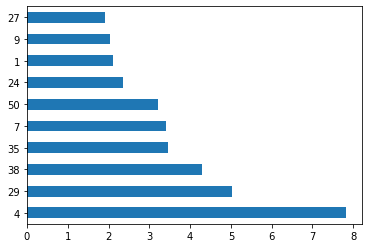

In [11]:
pd.Series(abs(clf_svc_lin.coef_[0]), index=range(51)).nlargest(10).plot(kind='barh')

In [12]:
38-25

13

In [13]:
#drop unnecessary keypoints
# Delete column at index 2 & 3
x_new_train2 = np.delete(x_new_train, [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)
x_new_test2  = np.delete(x_new_test,  [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)
x_new_test2.shape

(1277, 35)

0.7361002349256069


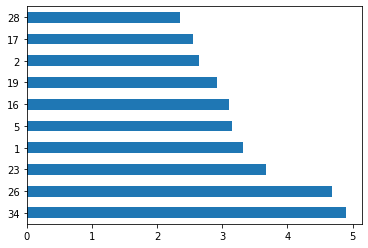

In [14]:
clf_svc_lin = svm.SVC(kernel='linear')
clf_svc_lin.fit(x_new_train2, y_train)
print(clf_svc_lin.score(x_new_test2,y_test))
pd.Series(abs(clf_svc_lin.coef_[0]), index=range(35)).nlargest(10).plot(kind='barh')

In [15]:
x_new_test[0]

array([0.43574922, 0.42334031, 0.33144306, 0.26394249, 0.21496772,
       0.50925035, 0.58601116, 0.62900171, 0.40513946, 0.34377293,
       0.27629846, 0.21187672, 0.47244396, 0.4970554 , 0.50007675,
       0.411219  , 0.45419455, 0.37749205, 0.47554335, 0.56751556,
       0.56763705, 0.48164697, 0.19346316, 0.17814857, 0.2149423 ,
       0.19962715, 0.26091837, 0.25793882, 0.37123893, 0.25488288,
       0.26096587, 0.37435222, 0.24869915, 0.57369136, 0.56761947,
       0.79135402, 0.95387804, 0.57678474, 0.78225277, 0.94163828,
       0.17803874, 0.17194087, 0.16895802, 0.15671084, 0.98768092,
       0.97543029, 0.95704171, 1.        , 0.99076333, 0.96307777,
       1.6208561 ])

In [16]:
indices=[34,26,23,1,5,16,19,2,17,28]
imp_features=[]
for i in indices:
    
    imp_features.append(np.where(x_new_test[0]== x_new_test2[0,i]))

In [17]:
imp_features=[50,38,35,1,9,24,27,2,25,44]
for i in imp_features:
    if( i >24):
        print(i-25)
    else:
        print(i)

25
13
10
1
9
24
2
2
0
19


In [18]:
clf_svc_lin.score(x_new_test2,y_test)

0.7361002349256069

In [19]:
clf_svc_lin.score(x_new_train2,y_train)

0.9448022079116836

In [20]:
clf_svc.score(x_new_test,y_test)

0.8386844166014096

In [21]:
clf_svc.score(x_new_train,y_train)

0.9609015639374425

In [22]:
#Logistic regression 
model.score(x_new_test,y_test)

0.6844166014095536

In [23]:
model.score(x_new_train,y_train)

0.9475620975160993

In [24]:
np.abs(model.coef_[0])

array([1.20995985, 1.46570213, 0.4788968 , 0.12663012, 5.46141984,
       2.12314795, 1.6177051 , 2.21040102, 0.80542809, 1.86920107,
       2.83445191, 1.48057451, 0.69929157, 2.534712  , 0.15232071,
       1.44135668, 1.47050501, 1.28207304, 0.94330704, 1.41481278,
       0.87675356, 0.06935683, 1.60277437, 1.24802101, 1.86524956,
       1.37917667, 2.28441283, 2.59376853, 0.73128506, 4.62318826,
       2.03474994, 0.0591053 , 2.29019523, 0.72052806, 0.86541072,
       3.71924895, 0.4899506 , 1.22600378, 5.13799686, 1.62548112,
       1.41772443, 1.56451287, 0.61793994, 1.22322728, 1.86224533,
       1.75567567, 1.12851631, 0.19024444, 0.06252694, 0.04402861,
       4.79723244])

In [25]:
np.abs(clf_svc_lin.coef_[0])

array([0.30820321, 3.31753946, 2.64613127, 1.23969464, 1.82855729,
       3.14115731, 0.88556476, 2.1341126 , 0.00888841, 1.19008968,
       0.80589996, 0.5455731 , 0.69757696, 0.75913688, 1.02000546,
       0.94491225, 3.10495697, 2.55030657, 1.98563556, 2.91555205,
       1.16793739, 1.16198816, 1.4740268 , 3.67109612, 0.89026994,
       1.53565191, 4.68955721, 1.69601275, 2.34420664, 2.1751382 ,
       1.26693233, 0.46906877, 0.34652337, 0.23881913, 4.89592871])

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(max_depth=5, random_state=0,)
rfor.fit(x_new_train, y_train)
rfor.score(x_new_test,y_test)

0.48472983555207516

In [27]:
rfor.feature_importances_

array([0.01242437, 0.01807005, 0.01024434, 0.0174633 , 0.01511412,
       0.02601775, 0.00687122, 0.00540247, 0.01172225, 0.00625809,
       0.00484415, 0.04310963, 0.00379487, 0.00472014, 0.0282723 ,
       0.02652441, 0.01815517, 0.01314183, 0.01462227, 0.03869319,
       0.02917185, 0.03374025, 0.03372368, 0.02145247, 0.0331541 ,
       0.01568389, 0.0056695 , 0.00985064, 0.00256641, 0.05081014,
       0.0212277 , 0.00400758, 0.02580266, 0.00496992, 0.00125416,
       0.03011555, 0.0099952 , 0.00722504, 0.01942081, 0.00226222,
       0.03966716, 0.04544717, 0.020895  , 0.02356273, 0.00047561,
       0.00859143, 0.00541583, 0.00309501, 0.0032373 , 0.00457646,
       0.15746658])

In [28]:
rfor.n_estimators

100

In [29]:
0.15746658/0.05081014

3.0991172234518545

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
clf_svc.predict(x_n)

array(['wide', 'normal', 'normal', ..., 'narrow', 'normal', 'normal'],
      dtype='<U6')